https://github.com/7astro7/full_fred

In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from full_fred.fred import Fred
import datetime as dt
import requests
from bs4 import BeautifulSoup
import re

In [192]:
fred = Fred('../data/api_key')
fred.get_api_key_file()

'../data/api_key'

In [193]:
fred.get_child_categories(0)

{'categories': [{'id': 32991,
   'name': 'Money, Banking, & Finance',
   'parent_id': 0},
  {'id': 10,
   'name': 'Population, Employment, & Labor Markets',
   'parent_id': 0},
  {'id': 32992, 'name': 'National Accounts', 'parent_id': 0},
  {'id': 1, 'name': 'Production & Business Activity', 'parent_id': 0},
  {'id': 32455, 'name': 'Prices', 'parent_id': 0},
  {'id': 32263, 'name': 'International Data', 'parent_id': 0},
  {'id': 3008, 'name': 'U.S. Regional Data', 'parent_id': 0},
  {'id': 33060, 'name': 'Academic Data', 'parent_id': 0}]}

In [194]:
test = fred.get_series_df('GDPPOT')
test[test['value'] != '.']

,realtime_start,realtime_end,date,value
4,2023-09-07,2023-09-07,1950-01-01,2218.5665855133384
5,2023-09-07,2023-09-07,1950-04-01,2248.1618216748607
6,2023-09-07,2023-09-07,1950-07-01,2277.0496823235985
7,2023-09-07,2023-09-07,1950-10-01,2306.715167343248
8,2023-09-07,2023-09-07,1951-01-01,2336.504742120727
...,...,...,...,...
303,2023-09-07,2023-09-07,2024-10-01,21052.3
304,2023-09-07,2023-09-07,2025-01-01,21143.69
305,2023-09-07,2023-09-07,2025-04-01,21235.79
306,2023-09-07,2023-09-07,2025-07-01,21329.03


In [195]:
len(test)

340

In [196]:
fred.series_stack.keys()

dict_keys(['get_series_df'])

In [197]:
fred.release_stack.keys()

dict_keys([])

In [198]:
fred.get_child_categories(0)['categories']

[{'id': 32991, 'name': 'Money, Banking, & Finance', 'parent_id': 0},
 {'id': 10, 'name': 'Population, Employment, & Labor Markets', 'parent_id': 0},
 {'id': 32992, 'name': 'National Accounts', 'parent_id': 0},
 {'id': 1, 'name': 'Production & Business Activity', 'parent_id': 0},
 {'id': 32455, 'name': 'Prices', 'parent_id': 0},
 {'id': 32263, 'name': 'International Data', 'parent_id': 0},
 {'id': 3008, 'name': 'U.S. Regional Data', 'parent_id': 0},
 {'id': 33060, 'name': 'Academic Data', 'parent_id': 0}]

In [199]:
fred.category_stack['get_child_categories']

{'categories': [{'id': 32991,
   'name': 'Money, Banking, & Finance',
   'parent_id': 0},
  {'id': 10,
   'name': 'Population, Employment, & Labor Markets',
   'parent_id': 0},
  {'id': 32992, 'name': 'National Accounts', 'parent_id': 0},
  {'id': 1, 'name': 'Production & Business Activity', 'parent_id': 0},
  {'id': 32455, 'name': 'Prices', 'parent_id': 0},
  {'id': 32263, 'name': 'International Data', 'parent_id': 0},
  {'id': 3008, 'name': 'U.S. Regional Data', 'parent_id': 0},
  {'id': 33060, 'name': 'Academic Data', 'parent_id': 0}]}

In [200]:
fred.source_stack['get_all_sources']

KeyError: 'get_all_sources'

In [201]:
test = fred.get_series_df('GNPCA')
test[test['value'] != '.']

,realtime_start,realtime_end,date,value
0,2023-09-07,2023-09-07,1929-01-01,1120.718
1,2023-09-07,2023-09-07,1930-01-01,1025.678
2,2023-09-07,2023-09-07,1931-01-01,958.927
3,2023-09-07,2023-09-07,1932-01-01,834.769
4,2023-09-07,2023-09-07,1933-01-01,823.628
...,...,...,...,...
89,2023-09-07,2023-09-07,2018-01-01,18874.78
90,2023-09-07,2023-09-07,2019-01-01,19286.841
91,2023-09-07,2023-09-07,2020-01-01,18685.401
92,2023-09-07,2023-09-07,2021-01-01,19759.327


In [202]:
gnpca = fred.get_series_df('GNPCA')[['date', 'value']]

In [203]:
gnpca.set_index('date', inplace = True)

In [204]:
gnpca.index = pd.to_datetime(gnpca.index)

In [205]:
gnpca.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 94 entries, 1929-01-01 to 2022-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   value   94 non-null     object
dtypes: object(1)
memory usage: 1.5+ KB


In [206]:
gnpca.head()

,value
date,
1929-01-01,1120.718
1930-01-01,1025.678
1931-01-01,958.927
1932-01-01,834.769
1933-01-01,823.628


In [207]:
gnpca.isna().sum()

value    0
dtype: int64

In [208]:
gnpca['value'] = gnpca['value'].astype(float)

C:\Users\User\AppData\Local\Temp\ipykernel_696\211970581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gnpca['value'] = gnpca['value'].astype(float)


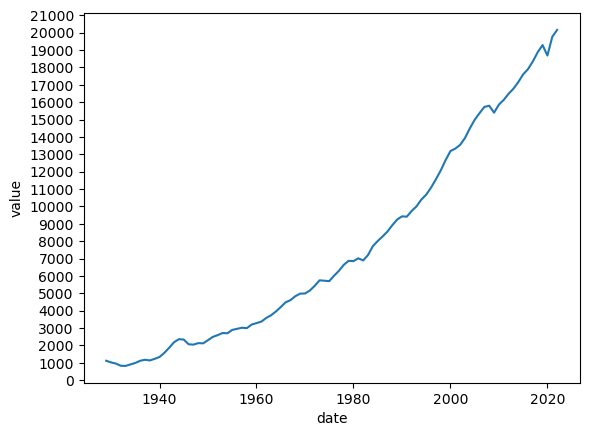

In [209]:
sns.lineplot(x = gnpca.index, y = gnpca['value']);
plt.yticks(range(0, int(max(gnpca['value'])) + 1000, 1000));

C:\Users\User\AppData\Local\Temp\ipykernel_696\4166311938.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metric['value'] = metric['value'].astype(float)


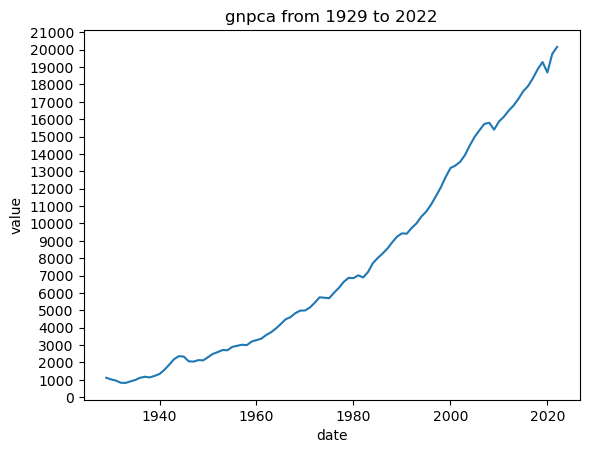

In [210]:
def ez_plotter(metric):
        metric_literal = metric
        metric = fred.get_series_df(metric)[['date', 'value']]
        metric.set_index('date', inplace = True)
        metric.index = pd.to_datetime(metric.index)
        metric['value'] = metric['value'].astype(float)

        sns.lineplot(x = metric.index, y = metric['value']);
        plt.yticks(range(0, int(max(metric['value'])) + 1000, 1000));
        plt.title(f"{metric_literal} from {metric.index.year[0]} to {metric.index.year[-1]}")
    
ez_plotter('gnpca')

In [211]:
gdppot =  fred.get_series_df('GDPPOT')[['date', 'value']]

In [212]:
gdppot[gdppot['value'] ==  '.']

,date,value
0,1949-01-01,.
1,1949-04-01,.
2,1949-07-01,.
3,1949-10-01,.
308,2026-01-01,.
309,2026-04-01,.
310,2026-07-01,.
311,2026-10-01,.
312,2027-01-01,.
313,2027-04-01,.


Missing potential GDP data for the far future makes sense, but why these data are missing for the year 1949 is harder to explain.

In order to allow these data to be visualized, I'll create a subset which doesn't extend into the future, then set the missing data in 1949 to be null. Then I'll plot, impute and plot again.

In [213]:
gdppot.set_index('date', inplace = True)

In [214]:
gdppot.index = pd.to_datetime(gdppot.index)

In [215]:
gdppot_subset = gdppot.loc[:'2025-12-31']

In [ ]:
gdppot_subset.tail()

________
Importing beige book data

In [243]:
url = "https://www.federalreserve.gov/monetarypolicy/beigebook202301-summary.htm"
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")
    text_data = soup.get_text()

In [227]:
text_data

"ï»¿\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nThe Fed - Monetary Policy: Beige Book (Branch)\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSkip to main content\n\n\n\nBack to Home\nBoard of Governors of the Federal Reserve System\n\n\nStay Connected\n\n\n\n\nLink to Federal Reserve Facebook Page\n\n\n\n\nLink to Federal Reserve Twitter Page\n\n\n\n\nLink to Federal Reserve YouTube Page\n\n\n\n\nLink to Federal Reserve Flickr Page\n\n\n\n\nFederal Reserve LinkedIn Page\n\n\n\n\nSubscribe to RSS\n\n\n\n\nSubscribe to Email\n\n\n\n\nRecent Postings\n\n\nCalendar\n\n\nPublications\n\n\nSite Map\n\n\nA-Z index\n\n\nCareers\n\n\nFAQs\n\n\nVideos\n\n\nContact\n\n\n\n\nSearch\n\n\n\nSubmit Search Button\n\n\n\n\n\nAdvanced\n\n\n\n\nToggle Dropdown Menu\n\n\n\n\n\n\n\nBoard of Governors of the Federal Reserve System\r\n            \n\nThe Federal Reserve, the central bank of the United States, provides\r\n          the nation with a safe, flexible, and stable monetary and financial\r\n          system.\n\n\n\n\n\

In [244]:
text_data = re.sub(r'\n+', ' ', text_data)
text_data

"ï»¿ The Fed - Monetary Policy: Beige Book (Branch) Skip to main content Back to Home Board of Governors of the Federal Reserve System Stay Connected Link to Federal Reserve Facebook Page Link to Federal Reserve Twitter Page Link to Federal Reserve YouTube Page Link to Federal Reserve Flickr Page Federal Reserve LinkedIn Page Subscribe to RSS Subscribe to Email Recent Postings Calendar Publications Site Map A-Z index Careers FAQs Videos Contact Search Submit Search Button Advanced Toggle Dropdown Menu Board of Governors of the Federal Reserve System\r              The Federal Reserve, the central bank of the United States, provides\r           the nation with a safe, flexible, and stable monetary and financial\r           system. Main Menu Toggle Button Sections Search Toggle Button Search Search Submit Button Submit About\r                 the Fed Structure of the Federal Reserve System The Fed Explained Board Members Advisory Councils Federal Reserve Banks Federal Reserve Act Currenc

In [245]:
text_data = re.sub(r'\r+', '', text_data)
text_data

"ï»¿ The Fed - Monetary Policy: Beige Book (Branch) Skip to main content Back to Home Board of Governors of the Federal Reserve System Stay Connected Link to Federal Reserve Facebook Page Link to Federal Reserve Twitter Page Link to Federal Reserve YouTube Page Link to Federal Reserve Flickr Page Federal Reserve LinkedIn Page Subscribe to RSS Subscribe to Email Recent Postings Calendar Publications Site Map A-Z index Careers FAQs Videos Contact Search Submit Search Button Advanced Toggle Dropdown Menu Board of Governors of the Federal Reserve System              The Federal Reserve, the central bank of the United States, provides           the nation with a safe, flexible, and stable monetary and financial           system. Main Menu Toggle Button Sections Search Toggle Button Search Search Submit Button Submit About                 the Fed Structure of the Federal Reserve System The Fed Explained Board Members Advisory Councils Federal Reserve Banks Federal Reserve Act Currency Board 

In [268]:
url = "https://www.federalreserve.gov/monetarypolicy/beigebook202301-summary.htm"
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")
    text_data = soup.get_text()
    
text_data = re.sub(r'\n+', ' ', text_data)
text_data = re.sub(r'\r+', '', text_data)
text_data = text_data.split('National Summary')
text_data = text_data[2]
text_data = text_data.split('Back to Top')
national_summary = text_data[0]
national_summary

" Overall Economic Activity Overall economic activity was relatively unchanged since the previous report. Five Districts reported slight or modest increases in overall activity, six noted no change or slight declines, and one cited a significant decline. On balance, contacts generally expected little growth in the months ahead. Consumer spending increased slightly, with some retailers reporting more robust sales over the holidays. Other retailers noted that high inflation continued to reduce consumers' purchasing power, particularly among low- and moderate-income households. Auto sales were flat on average, but some dealers noted that increased vehicle availability had boosted sales. Tourism contacts reported moderate to robust activity augmented by strong holiday travel. Manufacturers indicated that activity declined modestly on average, and, in many Districts, reported that supply chain disruptions had eased. Housing markets continued to weaken, with sales and construction declining 

In [279]:
url = "https://www.federalreserve.gov/monetarypolicy/beigebook202301-summary.htm"
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")
    text_data = soup.get_text()
    
text_data = re.sub(r'\n+', ' ', text_data)
text_data = re.sub(r'\r+', '', text_data)
text_data = text_data.split('National Summary')
text_data = text_data[2]
text_data = text_data.split('Back to Top')
national_summary = text_data[0]

# labor_markets
labor_markets = national_summary.split('Labor Markets')
labor_markets = labor_markets[1]

# prices
# prices = national_summary.split('Prices')
# prices = prices[1]
# prices

In [ ]:
def report_scraper(start_year, end_year):
    for y in range(start_year)